## Object Oriented Programming

Vrijwel ieder data science project bevat een Exploratory Data Analysis (EDA). In de EDA probeer je patronen en inzichten uit de data te verkrijgen. Het opschonen van de data wordt meestal ook gezien als een onderdeel van de EDA. De handelingen die je uitvoert zijn vaak (ongeveer) hetzelfde. Het is daarom nuttig om een EDA uit te voeren met Object Oriented Programming (OOP). Je kunt de classes die je maakt namelijk eenvoudig hergebruiken voor een volgend project. In deze opdracht gaan we met OOP een deel van de EDA uitvoeren op de transfer data van 2015-2016 van de Premier League.

We gaan de komende 5 lessen aan de slag met OOP. Alle opdrachten staan in dit notebook. Als richtlijn kun je de volgende indeling gebruiken:

- OOP les 1: opdrachten 1 t/m 4
- OOP les 2: opdrachten 5 t/m 7
- OOP les 3: opdrachten 8 t/m 11
- OOP les 4: opdrachten 12 t/m 14

- Voer onderstaande cel uit om de benodigde libraries te importeren en het dataframe tr15 aan te maken.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
tr15 = pd.read_csv('tr15_nan.csv')
tr15.head()

,date,year,window,int/ext,within_league,season,player_name,position,from_country,from_league,...,team,age_transfer,market value,fee amount,duration_cleaned,dur_rounded,fee amount_mean,date_deadline,days_to_deadline,dtd_rounded
0,2015-07-01,2015,1,E,False,15/16,Orlando Sá,Centre-Forward,Poland,Ekstraklasa,...,Reading FC,NaN,1.5,1.50,23.0,24,2.429250,2015-09-01,62,NaN
1,2015-08-12,2015,1,E,False,15/16,Paolo Hurtado,Attacking Midfield,Portugal,Primeira Liga,...,Reading FC,NaN,2.0,0.85,10.0,12,2.429250,2015-09-01,20,NaN
2,2015-08-03,2015,1,I,True,15/16,Alireza Jahanbakhsh,Right Winger,Netherlands,Eredivisie,...,AZ Alkmaar,NaN,2.0,1.80,10.0,12,1.561765,2015-08-31,28,NaN
3,2015-08-27,2015,1,I,True,15/16,Ben Rienstra,Central Midfield,Netherlands,Eredivisie,...,AZ Alkmaar,NaN,2.0,1.50,10.0,12,1.561765,2015-08-31,4,NaN
4,2015-07-01,2015,1,I,False,15/16,Vincent Janssen,Centre-Forward,Netherlands,Jupiler League,...,AZ Alkmaar,NaN,0.4,0.50,11.0,12,1.561765,2015-08-31,61,NaN


### 1 Lege waarden (NaN) analyseren
De eerste stap van de EDA is vaak bepalen hoeveel 'lege waardes' of NaN's er in iedere kolom zitten. 
1. Maak een dataframe waarbij je per kolom van tr15 het aantal lege waardes toont. Maak hierbij onder andere gebruik van isnull() en pd.DataFrame()
2. Maak een dataframe waarin je per kolom van tr15 het aantal niet-lege waardes toont.
3. Maak een daframe waarin je per kolom het totale aantal (leeg en niet-leeg) waardes toont.
4. Maak een dataframe waarin je per kolom van tr15 het percentage lege waardes toont.
5. Voeg de dataframes samen tot 1 dataframe
6. Hernoem de kolommen naar betekenisvollen kolomnamen.

In [3]:
tr15_isnull = pd.DataFrame(tr15.isnull().sum())
display(tr15_isnull)
tr15_notnull = pd.DataFrame(tr15.count())
display(tr15_notnull)
tr15_total = tr15_notnull + tr15_isnull
display(tr15_total)
tr15_perc = tr15_isnull / tr15_total * 100
display(tr15_perc)

,0
date,0
year,0
window,0
int/ext,0
within_league,0
season,0
player_name,1
position,0
from_country,0
from_league,0


,0
date,555
year,555
window,555
int/ext,555
within_league,555
season,555
player_name,554
position,555
from_country,555
from_league,555


,0
date,555
year,555
window,555
int/ext,555
within_league,555
season,555
player_name,555
position,555
from_country,555
from_league,555


,0
date,0.000000
year,0.000000
window,0.000000
int/ext,0.000000
within_league,0.000000
season,0.000000
player_name,0.180180
position,0.000000
from_country,0.000000
from_league,0.000000


In [4]:
tr15_nan = pd.concat([tr15_total, tr15_isnull, tr15_notnull, tr15_perc ], axis = 1)
tr15_nan.columns = ['total rows', 'rows with nan', 'rows without nan', 'perc nan']     
tr15_nan

,total rows,rows with nan,rows without nan,perc nan
date,555,0,555,0.000000
year,555,0,555,0.000000
window,555,0,555,0.000000
int/ext,555,0,555,0.000000
within_league,555,0,555,0.000000
season,555,0,555,0.000000
player_name,555,1,554,0.180180
position,555,0,555,0.000000
from_country,555,0,555,0.000000
from_league,555,0,555,0.000000


### 2 Lege waarden analyseren met OOP
- Definieer een 'class' die alleen bestaat uit een constructor (__ init__). Je kunt daarin een dataframe als parameter ingeven. Het dataframe wordt vervolgens in de constructor gebruikt om de dataframes van opdracht 1 te maken. Al deze dataframes worden vastgelegd in "object attributes" (self.). 
- Maak met de class een object aan met tr15 als parameter
- Toon het "object attribute" met daarin het dataframe met alle kolommen erin.

In [5]:
class DFNan:
    def __init__(self, df):
        self.df = df
        self.df_isnull = df.isnull().sum().to_frame()
        self.df_not_null = df.count().to_frame()
        self.df_total = self.df_isnull + self.df_not_null
        self.df_perc_nan = self.df_isnull / self.df_total * 100
        self.df_itp = pd.concat([self.df_total, self.df_isnull, self.df_not_null, self.df_perc_nan ], axis = 1)
        self.df_itp.columns = ['total rows', 'rows with nan', 'rows without nan', 'perc nan'] 
        
n = DFNan(tr15)

n.df_itp

,total rows,rows with nan,rows without nan,perc nan
date,555,0,555,0.000000
year,555,0,555,0.000000
window,555,0,555,0.000000
int/ext,555,0,555,0.000000
within_league,555,0,555,0.000000
season,555,0,555,0.000000
player_name,555,1,554,0.180180
position,555,0,555,0.000000
from_country,555,0,555,0.000000
from_league,555,0,555,0.000000


### 3 kolommen met veel NaN's verwijderen
- Maak een nieuw dataframe aan met daarin alleen de regels uit het object attribute waarvan het percentage NaN's groter is dan 20 procent.
- Zet de index van dit dataframe om in een list met als naam dropcols.
- Gebruik dropcols om tr15_dropped aan te maken waarin de kolommen in dropcols zijn verwijderded uit tr15.

In [6]:
df_todrop = n.df_itp.loc[n.df_itp['perc nan'] > 20 ]
dropcols = list(df_todrop.index)
tr15_dropped = tr15.drop(dropcols, axis = 1)
tr15_dropped

,date,year,window,int/ext,within_league,season,player_name,position,from_country,from_league,...,to_league,team,age_transfer,market value,fee amount,duration_cleaned,dur_rounded,fee amount_mean,date_deadline,days_to_deadline
0,2015-07-01,2015,1,E,False,15/16,Orlando Sá,Centre-Forward,Poland,Ekstraklasa,...,Championship,Reading FC,NaN,1.50,1.50,23.0,24,2.429250,2015-09-01,62
1,2015-08-12,2015,1,E,False,15/16,Paolo Hurtado,Attacking Midfield,Portugal,Primeira Liga,...,Championship,Reading FC,NaN,2.00,0.85,10.0,12,2.429250,2015-09-01,20
2,2015-08-03,2015,1,I,True,15/16,Alireza Jahanbakhsh,Right Winger,Netherlands,Eredivisie,...,Eredivisie,AZ Alkmaar,NaN,2.00,1.80,10.0,12,1.561765,2015-08-31,28
3,2015-08-27,2015,1,I,True,15/16,Ben Rienstra,Central Midfield,Netherlands,Eredivisie,...,Eredivisie,AZ Alkmaar,NaN,2.00,1.50,10.0,12,1.561765,2015-08-31,4
4,2015-07-01,2015,1,I,False,15/16,Vincent Janssen,Centre-Forward,Netherlands,Jupiler League,...,Eredivisie,AZ Alkmaar,NaN,0.40,0.50,11.0,12,1.561765,2015-08-31,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2015-07-01,2015,1,I,True,15/16,Chaker Alhadhur,Left-Back,France,Ligue 1,...,Ligue 1,SM Caen,23.0,1.00,0.05,11.0,12,1.335000,2015-08-31,61
551,2015-07-01,2015,1,E,False,15/16,Leandro Paredes,Central Midfield,Argentina,Primera División,...,Serie A,AS Roma,21.0,3.50,6.00,11.0,12,10.598367,2015-08-31,61
552,2015-08-31,2015,1,E,False,15/16,Ezequiel Ponce,Centre-Forward,Argentina,Primera División,...,Serie A,AS Roma,18.0,6.00,4.20,16.0,18,10.598367,2015-08-31,0
553,2015-07-01,2015,1,I,False,15/16,Nemanja Radonjic,Left Winger,Italy,Campionato Primavera Girone C,...,Serie A,AS Roma,19.0,0.05,4.00,0.0,0,10.598367,2015-08-31,61


### 4 OOP: kolommen met veel NaN's verwijderen
- Breid de class van opdracht 2 uit met de method drop_cols. Deze methode heeft de parameter threshold (grenswaarde). 
- Vergelijkbaar met opdracht 3 zorgt drop_cols ervoor dat alle kolommen waarbij het percentage lege waardes groter is dan de grenswaarde worden verwijderd uit het dataframe. 
- De method "returned" het nieuwe dataframe
- Test de method door een object aan te maken met parameter tr15 en vervolgens met dit object de method drop_cols uit te voeren met threshold = 20. Zorg ervoor dat als resultaat het dataframe tr15_dropped wordt gemaakt.

In [7]:
class DFNan:
    def __init__(self, df):
        self.df = df
        self.df_isnull = df.isnull().sum().to_frame()
        self.df_not_null = df.count().to_frame()
        self.df_total = self.df_isnull + self.df_not_null
        self.df_perc_nan = self.df_isnull / self.df_total * 100
        self.df_itp = pd.concat([self.df_total, self.df_isnull, self.df_not_null, self.df_perc_nan ], axis = 1)
        self.df_itp.columns = ['total rows', 'rows with nan', 'rows without nan', 'perc nan']        
    def drop_cols (self, threshold = 100):
        self.to_drop = self.df_itp[self.df_itp['perc nan'] > threshold]
        dropcols = list(self.to_drop.index)       
        print('columns removed:', dropcols)
        return self.df.drop(dropcols, axis = 1)

In [8]:
drop = DFNan(tr15)
drop.df_itp

,total rows,rows with nan,rows without nan,perc nan
date,555,0,555,0.000000
year,555,0,555,0.000000
window,555,0,555,0.000000
int/ext,555,0,555,0.000000
within_league,555,0,555,0.000000
season,555,0,555,0.000000
player_name,555,1,554,0.180180
position,555,0,555,0.000000
from_country,555,0,555,0.000000
from_league,555,0,555,0.000000


In [9]:
tr15_dropped = drop.drop_cols(50)
display(tr15_dropped.info(), tr15.info())

columns removed: ['dtd_rounded']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              555 non-null    object 
 1   year              555 non-null    int64  
 2   window            555 non-null    int64  
 3   int/ext           555 non-null    object 
 4   within_league     555 non-null    bool   
 5   season            555 non-null    object 
 6   player_name       554 non-null    object 
 7   position          555 non-null    object 
 8   from_country      555 non-null    object 
 9   from_league       555 non-null    object 
 10  from_team         555 non-null    object 
 11  to_country        555 non-null    object 
 12  to_league         555 non-null    object 
 13  team              555 non-null    object 
 14  age_transfer      500 non-null    float64
 15  market value      555 non-null    float64
 16  fee amount 

None

None

### 5 Missende waardes in age_transfer
We hebben nu het dataframe tr15_dropped aangemaakt, waarin 1 kolom uit tr15 is verwijderd.
- Gebruik de eerder gedefinieerde class om te laten zien dat er in de kolom age_transfer van tr15_dropped nog 55 lege waardes zijn.

In [10]:
nan = DFNan(tr15_dropped)
nan.df_itp

,total rows,rows with nan,rows without nan,perc nan
date,555,0,555,0.00000
year,555,0,555,0.00000
window,555,0,555,0.00000
int/ext,555,0,555,0.00000
within_league,555,0,555,0.00000
season,555,0,555,0.00000
player_name,555,1,554,0.18018
position,555,0,555,0.00000
from_country,555,0,555,0.00000
from_league,555,0,555,0.00000


### 6 Missende waardes en seaborn catplot.
In de kolom age_transfer vinden we 55 missende waardes. We hebben nu een aantal opties:
1. We verwijderen de kolom:
    - Hierdoor kunnen we leeftijd niet meer gebruiken als we de transferprijs willen voorspellen. Het is waarschijnlijk dat leeftijd invloed heeft op de prijs, dus verwijderen van de kolom lijkt niet verstandig.
2. We verwijderen de rijen waarin lege waardes staan:
    - We verliezen dan ook alle andere potentieel belangrijke informatie die in de rijen staat. Hierdoor zijn we waarschijnlijk minder goed in staat om de transfer prijs van een speler juist te voorspellen.
3. We vervangen de missende waardes door een andere waarde:
    - Hierdoor wordt de voorspellende waarde van deze kolom minder groot, er staan dan immers waardes in die hoogstwaarschijnlijk niet juist zijn. De meest gebruikte methode is om de gemiddelde leeftijd, de mediane leeftijd of de modale leeftijd te gebruiken als vervanger voor de missende waardes. Het kan best zo zijn dat de gemiddelde leeftijd in de premier league anders is dan de gemiddelde leeftijd in de eredivisie. Of dat de gemiddelde leeftijd voor een spits (centre forward) lager is dan die van een goalkeeper. Om tot een goede keuze te komen zullen we dit moeten onderzoeken. We gebruiken hiervoor catplot van Seaborn: https://seaborn.pydata.org/generated/seaborn.catplot.html
    
Met een catplot kun je numerieke waardes plotten per categorie. In dit geval is leeftijd (age_transfer) de numerieke waarde en zijn bijvoorbeeld to_league en position de categorieen.

- Maak een grafiek waarin je per competitie (to_league) laat zien wat de gemiddelde leeftijd is.
- Maak een grafiek waarin je per competitie (to_league) een boxplot laat zien. 

De gemiddelde leeftijd van een binnenlandse transfer kan afwijken van de leeftijd van een buitenlandse transfer. Met de hue parameter kunnen we nog een niveau dieper gaan:

- Pas bovenstaande grafieken aan waarbij de hue parameter de waarde 'int/ext' krijgt.

Beide grafieken worden onder elkaar getoond. Helaas hebben de grafieken verschillende x-assen waardoor ze moeilijk te vergelijken zijn.

- Gebruik xlim van pyplot (module van matplotlib) om de grafieken dezelfde x-assen (van 0 tot 35) te geven.



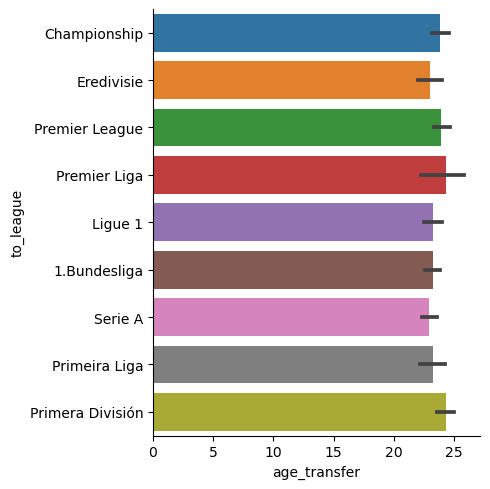

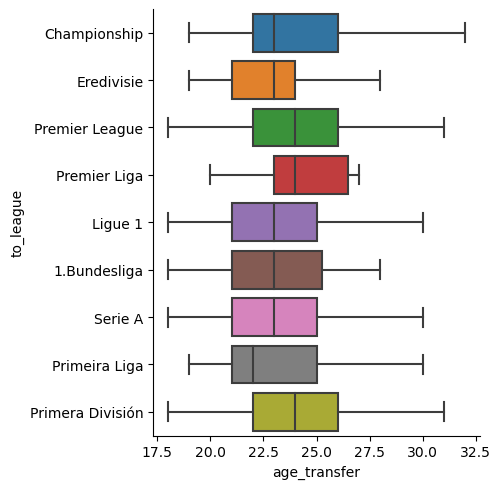

In [12]:
sns.catplot(data = tr15_dropped, x = 'age_transfer', y = 'to_league', kind = 'bar')
sns.catplot(data = tr15_dropped, x = 'age_transfer', y = 'to_league', kind = 'box')
plt.show()


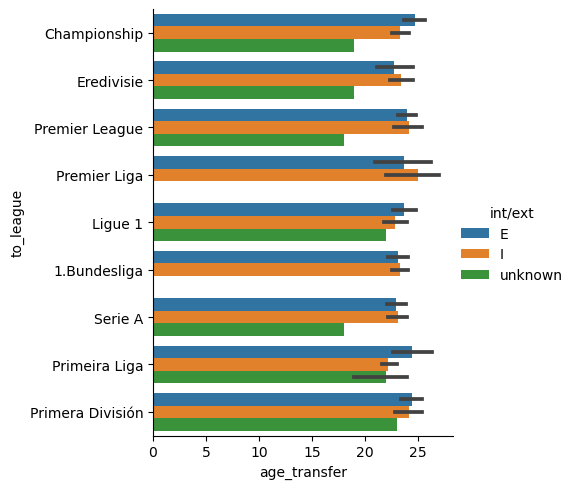

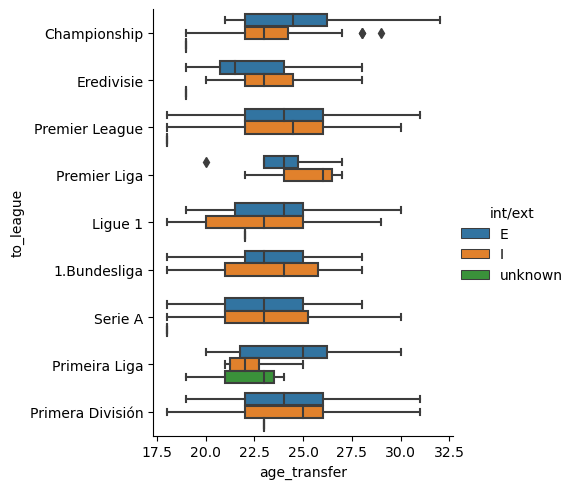

In [13]:
sns.catplot(data = tr15_dropped, x = 'age_transfer', y = 'to_league', kind = 'bar', hue ='int/ext')
sns.catplot(data = tr15_dropped, x = 'age_transfer', y = 'to_league', kind = 'box', hue = 'int/ext')
plt.show()

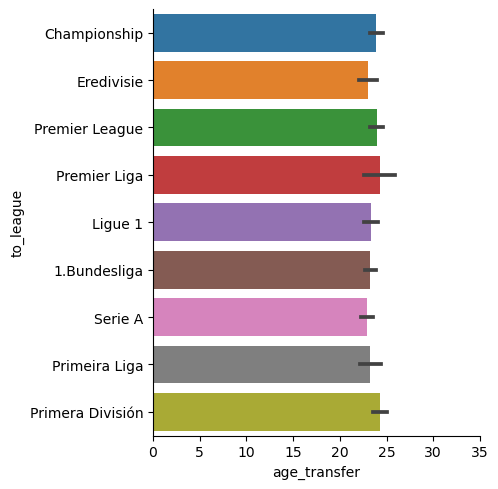

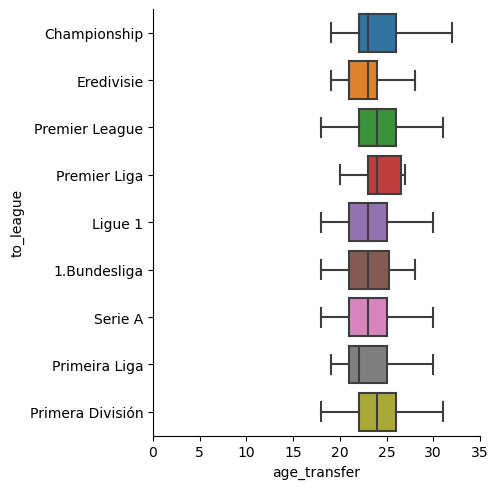

In [14]:
sns.catplot(data = tr15_dropped, x = 'age_transfer', y = 'to_league', kind = 'bar')
plt.xlim(0,35)
plt.show()
sns.catplot(data = tr15_dropped, x = 'age_transfer', y = 'to_league', kind = 'box')
plt.xlim(0,35)
plt.show()

### 7 Visualiseren met OOP
In de vorige opdracht heb je gezien dat we voor goede grafieken zowel seaborn als matplotlib nodig hebben. Beide libraries gaan op verschillende wijze met de parameters om. Ze hebben dus ieder een andere interface. Daarnaast zijn er parameters (zoals xlim) die we iedere keer opnieuw moeten invullen terwijl ze elke keer dezelfde waarde hebben. Daarom is in dit geval OOP een geschikte oplossing.
- definieer de class MyPlots
    - De constructor zorgt ervoor dat de parameters worden omgezet in object attributes voor het te analyseren dataframe en voor xlim.
    - In de method my_catplot zorg je ervoor dat je de grafieken uit opdracht 6 kunt namaken.
- Maak het object pl_age aan en toon aan dat je de grafieken kun namaken met de my_catplot method

In [15]:
class MyPlots:   
    def __init__(self, data, xlim_low=None, xlim_high=None):
        self.data = data
        self.xlim_low = xlim_low
        self.xlim_high = xlim_high
    def my_catplot(self, x, y, hue = None, kind='bar'):
        sns.catplot(data = self.data, x = x, y = y, hue = hue, kind = kind)
        plt.xlim(self.xlim_low, self.xlim_high)
        plt.show()  

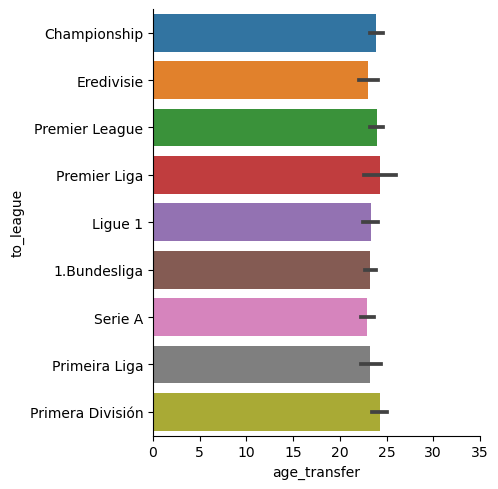

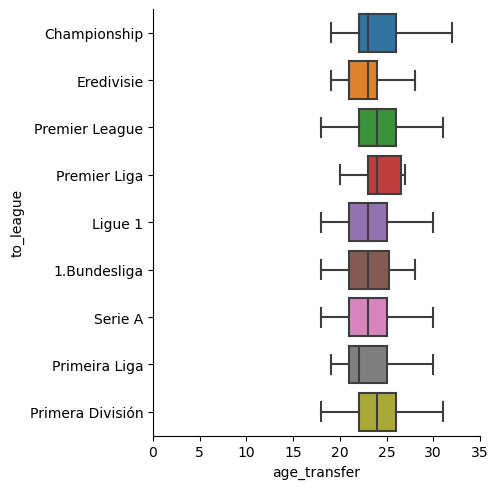

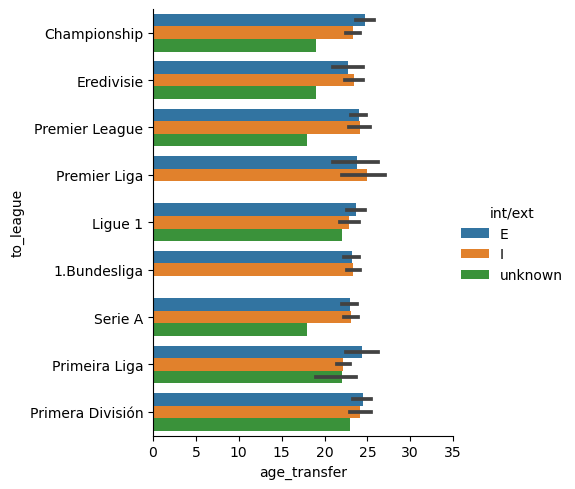

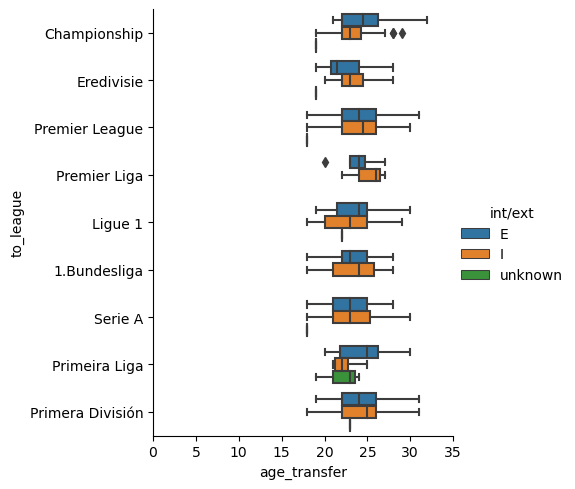

In [16]:
pl_age = MyPlots(tr15_dropped, xlim_low = 0, xlim_high = 35)
pl_age.my_catplot(x = 'age_transfer', y = 'to_league')
pl_age.my_catplot(x = 'age_transfer', y = 'to_league', kind = 'box')
pl_age.my_catplot(x = 'age_transfer', y = 'to_league', hue = 'int/ext')
pl_age.my_catplot(x = 'age_transfer', y = 'to_league', kind = 'box', hue = 'int/ext')

### 8 Class attributes
Het is prettig als alle grafieken dezelfde kleuren gebruiken en dezelfde afmetingen gebruiken. In catplots kun je dit instellen met de parameters palette, height en aspect. 

- Voeg deze parameters toe als "class-level attributes" zodat deze worden overgenomen in alle grafieken die met deze classes worden aangemaakt.

In [17]:
class MyPlots:
    PALETTE = 'RdYlGn'
    HEIGHT = 4
    ASPECT = 2 #width = height * aspect
    def __init__(self, data, xlim_low=None, xlim_high=None):
        self.data = data        
        self.xlim_low = xlim_low
        self.xlim_high = xlim_high
    def my_catplot(self, x, y, hue = None, kind='bar'):
        sns.catplot(data = self.data, x = x, y = y, palette = MyPlots.PALETTE, hue = hue, kind = kind, 
                    height = MyPlots.HEIGHT, aspect = MyPlots.ASPECT)
        plt.xlim(self.xlim_low, self.xlim_high)
        plt.show() 

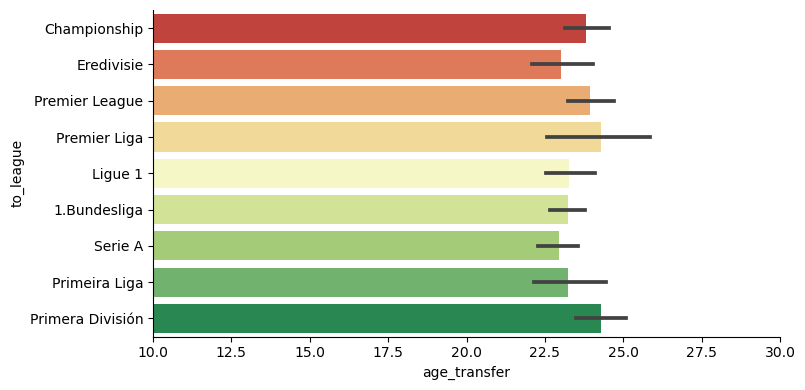

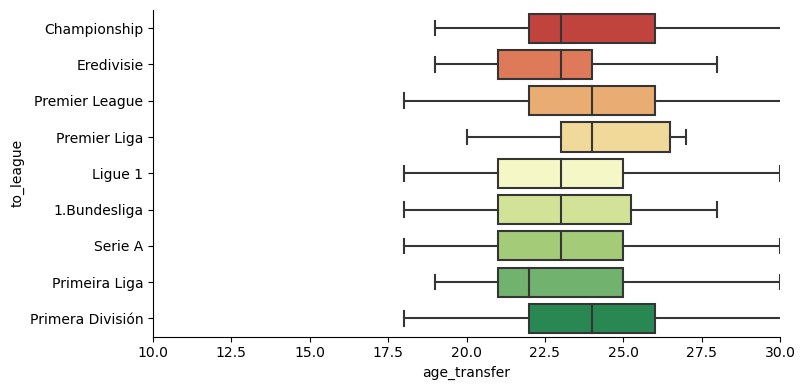

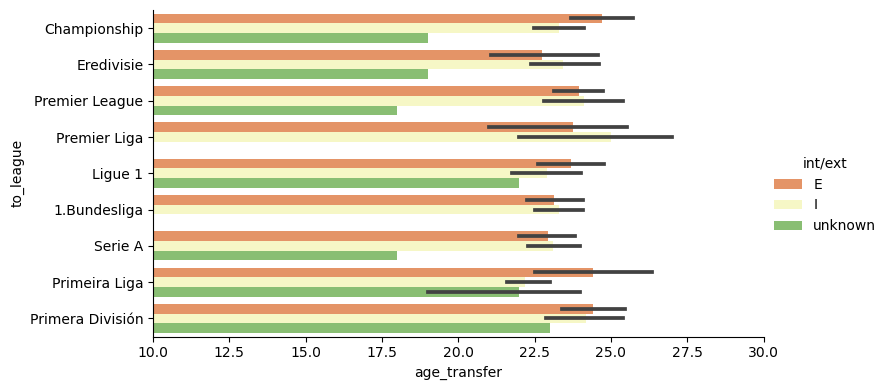

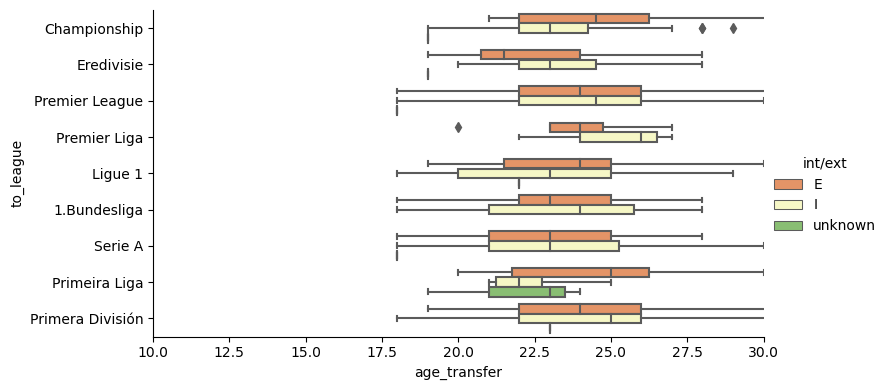

In [18]:
pl_age = MyPlots(tr15_dropped, xlim_low = 10, xlim_high = 30)
pl_age.my_catplot(x = 'age_transfer', y = 'to_league')
pl_age.my_catplot(x = 'age_transfer', y = 'to_league', kind = 'box')
pl_age.my_catplot(x = 'age_transfer', y = 'to_league', hue = 'int/ext')
pl_age.my_catplot(x = 'age_transfer', y = 'to_league', hue = 'int/ext', kind = 'box')

### 9 Missende waardes vullen

Via deze link vind je hoe je missende waardes kunt vullen met een groepsgemiddelde: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

- Pas dit toe op de age_transfer kolom. Maak groepen per combinatie van 'to league' en 'int/ext'. Vul de missende waardes met de mediaan van iedere groep.
- Controleer met de class van opdrachten 2 en 4 of er geen missende waardes meer zijn in tr15_dropped. 

In [20]:
tr15_dropped['age_transfer'] = tr15_dropped['age_transfer'].fillna(tr15_dropped.groupby(['to_league', 'int/ext'])['age_transfer'].transform(np.median))

In [21]:
nan = DFNan(tr15_dropped)
dir(nan)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'df',
 'df_isnull',
 'df_itp',
 'df_not_null',
 'df_perc_nan',
 'df_total',
 'drop_cols']

In [22]:
nan.df_itp

,total rows,rows with nan,rows without nan,perc nan
date,555,0,555,0.00000
year,555,0,555,0.00000
window,555,0,555,0.00000
int/ext,555,0,555,0.00000
within_league,555,0,555,0.00000
season,555,0,555,0.00000
player_name,555,1,554,0.18018
position,555,0,555,0.00000
from_country,555,0,555,0.00000
from_league,555,0,555,0.00000


### 10 Tidy data met melt()

Voor catplot is het nodig dat je 'tidy data' hebt. Dit betekent dat de data in 'long format' moet zijn. Voor sommige analyses zullen we daarom melt() moeten toepassen. Als we onderstaande grafiek willen maken dan lukt het niet om aan te geven dat we de kolommen 'market value' en 'fee amount' voor de hue parameter willen gebruiken. We zullen daarom eerst melt() moeten toepassen.

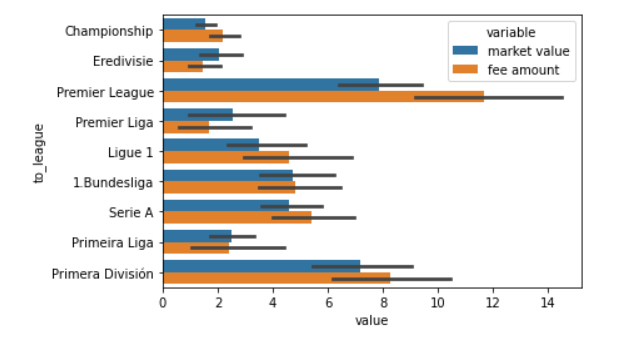

- Maak een nieuw dataframe tr15_m dat overeenkomt met onderstaande afbeelding:

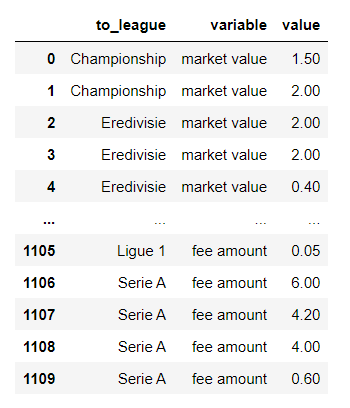

- Maak met dit dataframe de grafiek zoals hierboven getoond.

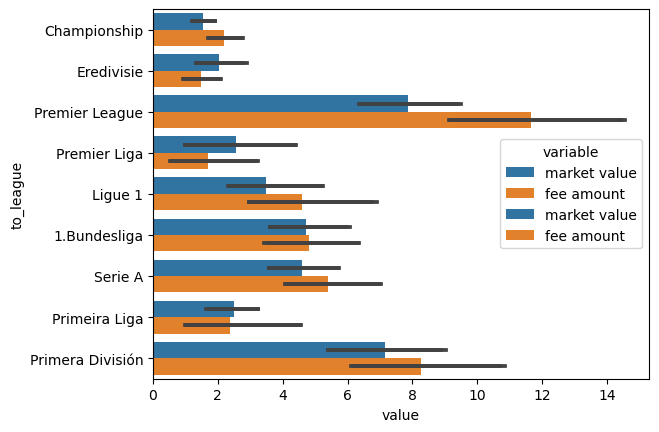

In [24]:
tr15_m = tr15_dropped[['to_league', 'market value', 'fee amount']].melt(id_vars = 'to_league' )
sns.barplot(data = tr15_m, x = 'value', y = 'to_league', hue = 'variable')
plt.show()

### 11 Overerving
- Maak de class MyMeltPlots die alles overneemt uit MyPlots.
- Pas de method my_catplot aan in MyMeltPlots (child) waarbij je eerst melt() uitvoert voordat je my_catplot uit MyPlots (parent) uitvoert.

In [25]:
class MyPlots:
    PALETTE = 'RdYlGn'
    HEIGHT = 4
    ASPECT = 2 #width = height * aspect
    def __init__(self, data, xlim_low=None, xlim_high=None):
        self.data = data
        self._df = self.data ## added to avoid changing self.data in children
        self.xlim_low = xlim_low
        self.xlim_high = xlim_high
    def my_catplot(self, x, y, hue = None, kind='bar'):
        sns.catplot(data = self._df, x = x, y = y, palette = MyPlots.PALETTE, hue = hue, kind = kind, 
                    height = MyPlots.HEIGHT, aspect = MyPlots.ASPECT)
        plt.xlim(self.xlim_low, self.xlim_high)
        plt.show()  

class MyMeltPlots(MyPlots):
    def __init__(self, data, xlim_low = None, xlim_high = None):
        MyPlots.__init__(self, data, xlim_low, xlim_high)
    def my_catplot(self, x, y, kind='bar'):
        self._df = self.data[x+[y]].melt(id_vars=y)       
        hue = 'variable'
        x = 'value'        
        MyPlots.my_catplot(self, x, y, hue, kind)

In [26]:
t = MyMeltPlots(tr15_dropped)

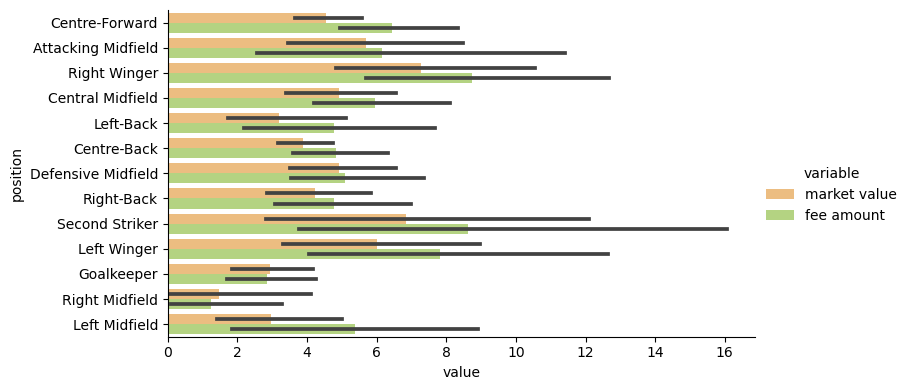

In [27]:
t.my_catplot(['market value', 'fee amount'], 'position')

### 13 Errors

Bij het uitvoeren van my_catplot is het belangrijk om de exacte kolomnamen te gebruiken. Hierbij is een typefout snel gemaakt. Vandaar dat het zinvol is om zorg te dragen voor goede "error-handling".
- Vind uit welk soort error er ontstaat als je een typefout maakt in de kolomnamen. Hint: de "error type" van de MyPlot class is niet dezelfde als die van de MyMeltPlots class.
- Voeg een try / except blok toe in beide classes en zorg ervoor dat er begrijpelijke aanwijzingen worden geprint als er een typefout wordt gemaakt.
- Toon aan dat het try / except blok goed werkt voor beide classes.

In [31]:
class MyPlots:
    COLORS = 'RdYlGn'
    HEIGHT = 4
    ASPECT = 2 #width = height * aspect
    def __init__(self, data, xlim_low=None, xlim_high=None): 
        self.data = data
        self._df = self.data
        self.xlim_low = xlim_low
        self.xlim_high = xlim_high
    def my_catplot(self, x, y, hue = None, kind='bar'):
        try:
            sns.catplot(data = self._df, x = x, y = y, palette = MyPlots.COLORS, hue = hue, kind = kind, 
                    height = MyPlots.HEIGHT, aspect = MyPlots.ASPECT)
        except ValueError:
            print("Make sure x, y and hue are a column name. Check data.columns")         
        plt.xlim(self.xlim_low, self.xlim_high)                  
        plt.show()

In [32]:
t = MyPlots(tr15_dropped)

Make sure x, y and hue are a column name. Check data.columns


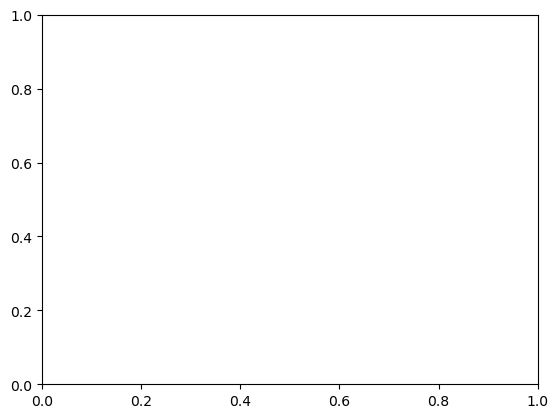

In [33]:
t.my_catplot('fee_amount', 'position')

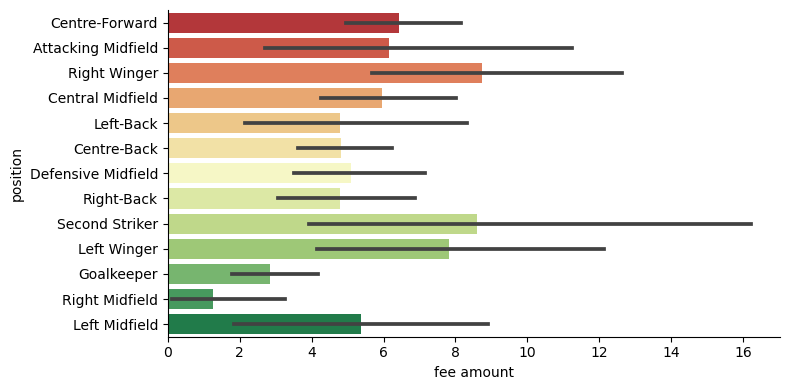

In [34]:
t.my_catplot('fee amount', 'position')

In [35]:
class MyMeltPlots(MyPlots):
    def __init__(self, data, xlim_low = None, xlim_high = None):
        MyPlots.__init__(self, data, xlim_low, xlim_high)
    def my_catplot(self, x, y, kind='bar'):
        try:
            self._df = self.data[x + [y]].melt(id_vars=y)
            hue = 'variable'
            x = 'value'        
            MyPlots.my_catplot(self, x, y, hue, kind)
        except TypeError:
            print('make sure x is a list and y is a single string')
        except KeyError:
            print("Make sure x, y and hue are column names. Check data.columns")

In [36]:
melt = MyMeltPlots(tr15_dropped)

In [37]:
melt.my_catplot(['fee_amount', 'market value'], 'position')

Make sure x, y and hue are column names. Check data.columns


In [38]:
melt.my_catplot(['fee amount', 'market value'], ['position'])

make sure x is a list and y is a single string


/Users/ardit/opt/anaconda3/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


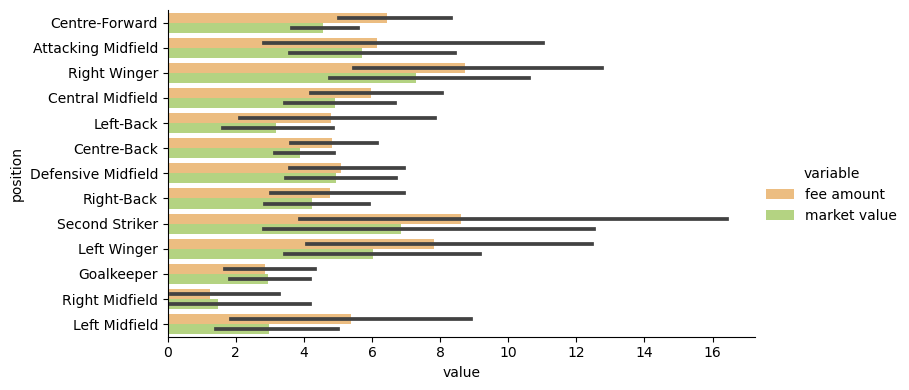

In [39]:
melt.my_catplot(['fee amount', 'market value'], 'position')

### 14 Read only attributes
Soms is het gewenst om ervoor te zorg dat sommige 'attributes' niet meer kunnen worden gewijzigd nadat het object is aangemaakt. 
- Zorg ervoor dat het attribute self.data een read-only attribute wordt.
- Toon aan dat het niet meer gewijzigd kan worden nadat het object is aangemaakt.

In [40]:
class MyPlots:
    COLORS = 'RdYlGn'
    HEIGHT = 4
    ASPECT = 2 #width = height * aspect
    def __init__(self, data, xlim_low=None, xlim_high=None): 
        self._data = data
        self._df = self._data
        self.xlim_low = xlim_low
        self.xlim_high = xlim_high
    def my_catplot(self, x, y, hue = None, kind='bar'):
        try:
            sns.catplot(data = self._df, x = x, y = y, palette = MyPlots.COLORS, hue = hue, kind = kind, 
                    height = MyPlots.HEIGHT, aspect = MyPlots.ASPECT)
        except ValueError:
            print("Make sure x, y and hue are a column name. Check data.columns")         
        plt.xlim(self.xlim_low, self.xlim_high)                  
        plt.show()
    @property
    def data(self):
        return self._data

In [41]:
prop = MyPlots(tr15)
display(prop.data)
prop.data = tr15_m

,date,year,window,int/ext,within_league,season,player_name,position,from_country,from_league,...,team,age_transfer,market value,fee amount,duration_cleaned,dur_rounded,fee amount_mean,date_deadline,days_to_deadline,dtd_rounded
0,2015-07-01,2015,1,E,False,15/16,Orlando Sá,Centre-Forward,Poland,Ekstraklasa,...,Reading FC,NaN,1.50,1.50,23.0,24,2.429250,2015-09-01,62,NaN
1,2015-08-12,2015,1,E,False,15/16,Paolo Hurtado,Attacking Midfield,Portugal,Primeira Liga,...,Reading FC,NaN,2.00,0.85,10.0,12,2.429250,2015-09-01,20,NaN
2,2015-08-03,2015,1,I,True,15/16,Alireza Jahanbakhsh,Right Winger,Netherlands,Eredivisie,...,AZ Alkmaar,NaN,2.00,1.80,10.0,12,1.561765,2015-08-31,28,NaN
3,2015-08-27,2015,1,I,True,15/16,Ben Rienstra,Central Midfield,Netherlands,Eredivisie,...,AZ Alkmaar,NaN,2.00,1.50,10.0,12,1.561765,2015-08-31,4,NaN
4,2015-07-01,2015,1,I,False,15/16,Vincent Janssen,Centre-Forward,Netherlands,Jupiler League,...,AZ Alkmaar,NaN,0.40,0.50,11.0,12,1.561765,2015-08-31,61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2015-07-01,2015,1,I,True,15/16,Chaker Alhadhur,Left-Back,France,Ligue 1,...,SM Caen,23.0,1.00,0.05,11.0,12,1.335000,2015-08-31,61,60.0
551,2015-07-01,2015,1,E,False,15/16,Leandro Paredes,Central Midfield,Argentina,Primera División,...,AS Roma,21.0,3.50,6.00,11.0,12,10.598367,2015-08-31,61,60.0
552,2015-08-31,2015,1,E,False,15/16,Ezequiel Ponce,Centre-Forward,Argentina,Primera División,...,AS Roma,18.0,6.00,4.20,16.0,18,10.598367,2015-08-31,0,0.0
553,2015-07-01,2015,1,I,False,15/16,Nemanja Radonjic,Left Winger,Italy,Campionato Primavera Girone C,...,AS Roma,19.0,0.05,4.00,0.0,0,10.598367,2015-08-31,61,60.0


AttributeError: can't set attribute